## Network Science Coursework 2

Spring 2025

Due: March 17th, 1:00pm GMT

Please provide your CID number

CID:

In [44]:
# Do not modify this cell or import any other modules without explicit permission.
# You should run this cell before running the code below.
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# You may also use scipy as needed

# Overview

In this assignment, we will consider the spread of disease on a network with the SIR model. The SIR model is an extension to the SI model studied in lectures, where individuals can recover from the disease and are no longer susceptible or infected. Given $\phi_k$ is the probability that a node with degree $k$ is infectious for the SIR model, it can be shown by assuming a degree-based approximation that the non-linear ODE for $\phi_k$ is 
$$\frac{d\phi_k}{dt}=-\gamma\phi_k+k\beta(1-\phi_k)\sum_{k'=1}^{k'_{max}}\theta(k,k')\phi_{k'-1},$$
where the function $\theta(k,k')$ gives the probability of a link on a node with degree $k$ being connected to a node with degree $k'$,  $\beta$ and $\gamma$ are model parameters. $\gamma\geq 0$ measures the rate of recovery and $\beta\geq 0$ the rate of infection. It is assumed that $\theta$ and $\phi_k$ are independent for any $k$. 

The purpose of the assignment is to investigate the dynamics of $\phi_k(t)$ for different graph structures. For this assignment, let the initial condition be $\phi_2(0)=0.001$ and for $k\neq 2$, $\phi_k(0)=0$. Assume that $\theta(k,k')=k'p_{k'}/\bar{k}$, where $\bar{k}=(\sum_{i=1}^N k_i)/N$, $p_k$ is the fraction of nodes with degree $k$ and $k_i$ is the degree of node $i$. 

## Part 1: Linear analysis

An equilibrium exists when $\phi_k=0$ for all $k$. It can be shown that a small a perturbation $\tilde{\phi_k}$ to the equilibrium, satisfies the linearised equation 
$$\frac{d\tilde{\phi}_k}{dt}=-\gamma\tilde{\phi}_k+\frac{k\beta}{\bar{k}}\sum_{k'=0}^{k'_{max}-1}(k'+1)p_{k'+1}\tilde{\phi}_{k'}.$$

(a) Find the analytical solution to the linearised equation, where the initial condition for $\tilde{\phi_k}$ is $\tilde{\phi_k}(0)=\tilde{\phi_k}^0$.

(b) Determine the critical value of $\gamma$, $\gamma_c$, for which the linear theory suggests perturbations will grow if $\gamma<\gamma_c$, and decay if $\gamma>\gamma_c$. Give $\gamma_c$ in terms of $\beta, \bar{k}, \bar{k}^2$.


*Write your solution to (a) here*

We are given that

$$\frac{d\tilde{\phi}_k}{dt}=-\gamma\tilde{\phi}_k+k\beta\sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} \tilde{\phi}_{k'} \; \;(*)$$

Let $$\psi = \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} \tilde{\phi}_{k'} \; \;(**)$$

So that $$\frac{d\tilde{\phi}_k}{dt}=-\gamma\tilde{\phi}_k +k\beta\psi\;\; (***)$$

Differentiating (**) gives us

$$\frac{d\psi}{dt} = \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} \frac{\tilde{\phi}_{k'}}{dt}$$

Using (***) gives us

$$\frac{d\psi}{dt} = \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} [-\gamma\tilde{\phi}_{k'} +k'\beta\psi]
$$

So
$$\frac{d\psi}{dt} = -\gamma\psi +\beta\psi \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}}k'
$$

From Lectures, this then simplifies to

$$\frac{d\psi}{dt} = -\gamma\psi +\beta\psi (\frac{\bar{k^2}}{\bar{k}} -1) = \psi(-\gamma +\beta (\frac{\bar{k^2}}{\bar{k}} -1))$$

Define $\alpha = -\gamma +\beta (\frac{\bar{k^2}}{\bar{k}} -1)
$

This then gives us the following 2 differential equations to solve
$$ \frac{d\psi}{dt} = \alpha\psi$$
$$\frac{d\tilde{\phi}_k}{dt}=-\gamma\tilde{\phi}_k +k\beta\psi$$

The first can be simply solved to give $\psi = \psi_0 e^{\alpha t}$ where $$\psi_0 = \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} {\tilde{\phi}^0_{k'}}$$

Using the above equaution for $\psi$ and rearranging the second differential equation gives us that 
$$\frac{d\tilde{\phi}_k}{dt} +\gamma\tilde{\phi}_k = k\beta\psi_0 e^{\alpha t}
$$



Using the intergating factor $e^{\gamma t}$ gives
$$\frac{d}{dt}(\tilde{\phi}_ke^{\gamma t}) = k\beta\psi_0 e^{(\alpha + \gamma) t}
$$

Hence
$$\tilde{\phi}_ke^{\gamma t} = \frac{k\beta\psi_0}{\alpha+\gamma}(e^{(\alpha + \gamma) t} - 1) + {\tilde{\phi}}^0_k
$$

Finally, 
$$\tilde{\phi}_k(t) = \frac{k\beta\psi_0}{\alpha+\gamma}e^{\alpha t} + ({\tilde{\phi}}^0_k -\frac{k\beta\psi_0}{\alpha+\gamma})e^{-\gamma t}
$$


*Give your solution to (b) here*

As $\gamma$ is non-neagtive, $Ae^{-\gamma t}$ diminishes (or stays constant) with time. Hence, the growth/decay of this system is determined by the sign of $\alpha = -\gamma +\beta (\frac{\bar{k^2}}{\bar{k}} -1)$ 

Hence our critical value $\gamma_c$ is found when $\alpha = 0$ 

$$\alpha = 0 \implies \gamma_c = \beta (\frac{\bar{k^2}}{\bar{k}} -1)
$$

Since $\frac{k\beta\psi_0}{\alpha+\gamma} \geq 0$,

If $\gamma < \gamma_c$ then $\alpha > 0$, which implies growth

If $\gamma > \gamma_c$ then $\alpha < 0$, which implies decay

## Part 2: Numerical solution

(a) Develop the function *phi_k_solve* below that computes the numerical solution of the nonlinear equation for $\phi_{k}$ given a graph $G$, where $k>0$ and therefore $\phi_0(t)=0$. *phi_k_solve* should efficiently and accurately simulate the model for $Nt$ time steps from $t=0$ to $t=tf$ with the initial condition provided. It is suggested that you use RK45 method in the solver. The function should return an array of $\phi_k$ for each $k>0$, at each time step (including the initial condition). The accuracy of the solution is tested in part (b). Although your model should work with simple graphs of large N, you should use a suitable graph of $N\sim 20$ to test your code. Add a brief explanation of how you have designed your function and the steps you have taken to make your code efficient.

(b) Find the analytical solution when $\beta=0, \gamma=0.1$ and produce a test for your code for this case. Produce a figure that illustrates the accuracy of your code for $0\leq t \leq 20$. Your code should ensure that the magnitude of the differnce between the exact solution and the computed solution for $\phi_2(t)$ is less than $1e^{-5}$ at $t=1$. Provide a brief discussion. 


In [51]:
#Answer to part (a)
import scipy.sparse as sp
from scipy.integrate import solve_ivp

def RHS(t, x, G, gamma, beta, kmax):
    
    #Precompute the sum coefficients (k' p_k'/ k bar for k' = 2 -> k' max)
    
    total_deg = sum(dict(G.degree()).values())
    h = nx.degree_histogram(G) #h[i] = n.nodes with degree i
    coeffs = np.array([h[i] * i for i in range(2, kmax + 1)]) / total_deg #k' p_k / k bar = n.nodes with degree k / total degree
    
    sums = np.dot(coeffs, x[:-1])  # x[:-1] corresponds to phi_1, phi_2, ..., phi_{kmax-1}

    dxdt = [-gamma*x[i] + (i+1)*beta*(1-x[i])*sums for i in range(kmax)]
                   
    return dxdt


def phi_k_solve(G,k0=1,p0=0.001,gamma=1e-2,beta=2,tf=20,Nt=1000):

    #Solve nonlinear equation for phi_k
    #Input:
        #g: N-node Undirected Networkx graph with nodes numbered from 1 to N
        #k0: initial condition on phi_{k0}
        #p0: magnitude of initial condition
        #beta, gamma: model parameters
        #tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)
    #Output:
        #tarray: size (insert) array
        #phi_array: size (insert) array 

    kmax = max(dict(G.degree()).values()) #finding max degree
    t = np.linspace(0,tf,Nt + 1)
    x0 = np.zeros(kmax)
    x0[k0-1] = p0 #initial condition for phi_k0
    sol = solve_ivp(RHS, [t[0], t[-1]], x0, args=(G, gamma, beta, kmax), t_eval=t, method='RK45') #solving adding additional args to t, x
    phi_array = sol.y
    tarray = sol.t

    return tarray, phi_array

#Quick check that the code runs without syntax errors
G = nx.barabasi_albert_graph(20,4,seed=1)

phi_k_solve(G,k0=2,p0=1,gamma=1e-2,beta=2,tf=20,Nt=1000)

(array([ 0.  ,  0.02,  0.04, ..., 19.96, 19.98, 20.  ]),
 array([[0.        , 0.00107334, 0.00246936, ..., 0.9949813 , 0.9949813 ,
         0.9949813 ],
        [1.        , 0.99980024, 0.99960115, ..., 0.99748434, 0.99748434,
         0.99748434],
        [0.        , 0.00321652, 0.00738981, ..., 0.99832148, 0.99832148,
         0.99832148],
        ...,
        [0.        , 0.01174298, 0.02683022, ..., 0.99954166, 0.99954166,
         0.99954166],
        [0.        , 0.01280361, 0.02923336, ..., 0.99957984, 0.99957984,
         0.99957984],
        [0.        , 0.01386309, 0.03163057, ..., 0.99948227, 0.99840518,
         0.99820754]]))

*Add brief discussion here on the steps taken to make your code efficient*

The key issue to overcome is the inefficiency when dealing with 
$$\sum_{k'=1}^{k'_{max}}\frac{k' p_{k'}}{\bar{k}}\phi_{k'-1} \;\;\; (*)$$
1) I start by precomputing all of the coefficients in the sum and storing them as a vector to avoid recalculation
2) Noting that $\phi_0 (t) = 0$ for all t, the lower index of the sum can start at $k' = 2$
3) Instead of calculating $\frac{p_{k'}}{\bar{k}}$ each time, I instead use
$$\frac{p_{k'}}{\bar{k}} = \frac{\frac{\text{n.nodes with degree k}}{N}}{\frac{\text{total degree}}{N}} = \frac{\text{n.nodes with degree k}}{\text{total degree}}$$
4) I then make use of numpy's efficient dot product function to evaluate (*)


*Answer to part (b) here*


array([0.001     , 0.00096079, 0.00092312, 0.00088692, 0.00085214,
       0.00081873, 0.00078663, 0.00075577, 0.00072601, 0.00069732,
       0.00066967, 0.00064305, 0.00061744, 0.0005928 , 0.00056912,
       0.00054637, 0.00052453, 0.00050358, 0.00048349, 0.00046424,
       0.00044579, 0.00042813, 0.00041123, 0.00039506, 0.0003796 ,
       0.00036481, 0.00035068, 0.00033716, 0.00032424, 0.00031189,
       0.00030006, 0.00028875, 0.00027791, 0.00026751, 0.00025753,
       0.00024793, 0.00023868, 0.00022976, 0.00022111, 0.00021272,
       0.00020455, 0.00019658, 0.00018887, 0.00018146, 0.00017435,
       0.00016751, 0.00016094, 0.00015463, 0.00014857, 0.00014274,
       0.00013715])

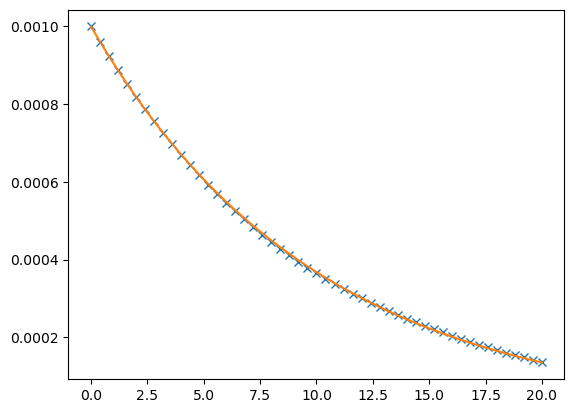

In [128]:
G = nx.barabasi_albert_graph(20,4,seed=1)

sol = phi_k_solve(G,k0=2,p0=0.001,gamma=0.1,beta=0,tf=20,Nt=50)
t, phi2 = sol[0], (sol[1])[1]
plt.plot(t,phi2,'x')
plt.plot(t,0.001 * np.exp(-0.1 * t),label='y1')
phi2

## Part 3: Results

You will now investigate how graph structure influences the spread of disease on a network. 

(a) Generate a balanced tree graph using *nx.balanced_tree* with $r=3$ (branching factor) and $h=5$ (height). Next, create a Barabási-Albert graph with the same number of nodes as the tree graph, where each new node is connected to one existing node by one additional link at each iteration. Compare the degree distribution of the two graphs. You should produce one figure, and a brief explanation.

(b) Using the function *phi_k_sol*, carefully investigate $\phi_k$ for the two graphs you have generated. Set $\beta=0.5$ and consider two cases: (1) $\gamma<\gamma_c$ and (2) $\gamma>\gamma_c$. Your analysis should carefully present relevant simulation results and make clear connections with the graph properties and model equations. You should produce a maximum of four figures and provide a brief explanation alongside your figures. 

(c) Describe how increasing $\beta$ affects the dynamics of the system. Explain why this occurs based on the model equation.

### Further guidance

* You should submit both a completed ipynb file (Jupiter notebook) and a pdf version of the notebook file (generated using File --- Download as in notebook). If you cannot generate a pdf, try installing latex first, or submit an html version instead. Create a zip file containing both.
    To submit your assignment, go to the _Assessments and Mark Schemes_ folder in the _Course Content_ on the Blackboard. Upload your PDF and ZIP file into _Coursework 2 Drop Box Spring 25_. All files should be named *coursework2_CID.ipynb*, *coursework2_CID.pdf* and *coursework2_CID.zip*,  where CID is your CID number).
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed. Please do not use any other packages without explicit permission.
*You are encouraged to discuss mathematics with other students and to make use of books, papers and online resources. However, you are expected to write up your own solutions for all individually assessed work. Any external assistance, e.g. from other people, books, or large language models, must be openly acknowledged. 
* Marking will be based on the correctness of your work, the efficiency of your codes, and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment.
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor.
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or during a problem class.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
